In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics
from sklearn.model_selection import cross_val_score

from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv("../input/home-data-for-ml-course/train.csv")
train = pd.DataFrame(data)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data = pd.read_csv("../input/home-data-for-ml-course/test.csv")
test = pd.DataFrame(data)
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
y = train['SalePrice']
train.drop(["SalePrice", "Id"], axis =1, inplace = True)
test.drop(["Id"], axis =1, inplace = True)

In [5]:
print("Train shape before dropping features more than 80% missing values: ", train.shape)
mv = train.isnull().sum()/len(train)
train = train.drop(columns=mv[mv>0.8].index)
print("Train shape after dropping features more than 80% missing values: ", train.shape)

print("Train shape before dropping features more than 80% missing values: ", test.shape)
mv = test.isnull().sum()/len(test)
train = test.drop(columns=mv[mv>0.8].index)
print("Train shape after dropping features more than 80% missing values: ", test.shape)

Train shape before dropping features more than 80% missing values:  (1460, 79)
Train shape after dropping features more than 80% missing values:  (1460, 75)
Train shape before dropping features more than 80% missing values:  (1459, 79)
Train shape after dropping features more than 80% missing values:  (1459, 79)


In [6]:
for x in train.columns:
    #printing unique values
    print(x ,':', len(train[x].unique()))

MSSubClass : 16
MSZoning : 6
LotFrontage : 116
LotArea : 1106
Street : 2
LotShape : 4
LandContour : 4
Utilities : 2
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 5
BldgType : 5
HouseStyle : 7
OverallQual : 10
OverallCond : 9
YearBuilt : 106
YearRemodAdd : 61
RoofStyle : 6
RoofMatl : 4
Exterior1st : 14
Exterior2nd : 16
MasVnrType : 5
MasVnrArea : 304
ExterQual : 4
ExterCond : 5
Foundation : 6
BsmtQual : 5
BsmtCond : 5
BsmtExposure : 5
BsmtFinType1 : 7
BsmtFinSF1 : 670
BsmtFinType2 : 7
BsmtFinSF2 : 162
BsmtUnfSF : 794
TotalBsmtSF : 737
Heating : 4
HeatingQC : 5
CentralAir : 2
Electrical : 4
1stFlrSF : 789
2ndFlrSF : 407
LowQualFinSF : 15
GrLivArea : 879
BsmtFullBath : 5
BsmtHalfBath : 4
FullBath : 5
HalfBath : 3
BedroomAbvGr : 7
KitchenAbvGr : 3
KitchenQual : 5
TotRmsAbvGrd : 12
Functional : 8
Fireplaces : 5
FireplaceQu : 6
GarageType : 7
GarageYrBlt : 98
GarageFinish : 4
GarageCars : 7
GarageArea : 460
GarageQual : 5
GarageCond : 6
PavedDrive : 3
WoodDeckSF :

In [7]:
# Filtering numerical data
num_df = train.select_dtypes(include=np.number)
print(num_df.shape)

# Filtering categorical data
cat_df = train.select_dtypes(exclude=np.number)
print(cat_df.shape)

(1459, 36)
(1459, 39)


In [8]:
# Filtering numerical data
num_df_test = test.select_dtypes(include=np.number)
print(num_df.shape)

# Filtering categorical data
cat_df_test = test.select_dtypes(exclude=np.number)
print(cat_df_test.shape)

(1459, 36)
(1459, 43)


In [9]:
for x in cat_df.columns:
    #printing unique values
    print(x ,':', len(cat_df[x].unique()))

MSZoning : 6
Street : 2
LotShape : 4
LandContour : 4
Utilities : 2
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 5
BldgType : 5
HouseStyle : 7
RoofStyle : 6
RoofMatl : 4
Exterior1st : 14
Exterior2nd : 16
MasVnrType : 5
ExterQual : 4
ExterCond : 5
Foundation : 6
BsmtQual : 5
BsmtCond : 5
BsmtExposure : 5
BsmtFinType1 : 7
BsmtFinType2 : 7
Heating : 4
HeatingQC : 5
CentralAir : 2
Electrical : 4
KitchenQual : 5
Functional : 8
FireplaceQu : 6
GarageType : 7
GarageFinish : 4
GarageQual : 5
GarageCond : 6
PavedDrive : 3
SaleType : 10
SaleCondition : 6


In [10]:

# Filling missing values by median for numerical columns 
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
num_df = pd.DataFrame(imp_median.fit_transform(num_df), columns=num_df.columns)
print(num_df.shape)

# Filling missing values by most frequent value for categorical columns
for i in cat_df.columns:
    cat_df[i] = cat_df[i].fillna(cat_df[i].mode()[0])
    
cat_df.isnull().sum()
num_df.isnull().sum()

(1459, 36)


MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [11]:
# Filling missing values by median for numerical columns 
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
num_df_test = pd.DataFrame(imp_median.fit_transform(num_df_test), columns=num_df_test.columns)
print(num_df_test.shape)

# Filling missing values by most frequent value for categorical columns
for i in cat_df_test.columns:
    cat_df_test[i] = cat_df_test[i].fillna(cat_df_test[i].mode()[0])
    
cat_df_test.isnull().sum()
num_df_test.isnull().sum()

(1459, 36)


MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

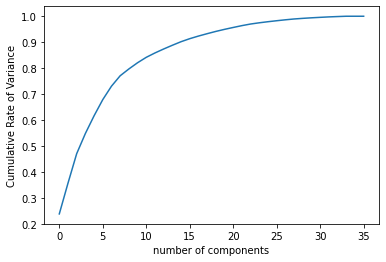

In [12]:
scaled_num = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(num_df), columns = num_df.columns)
#optimuadd_suffixm number of components
pca = PCA().fit(scaled_num)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("Cumulative Rate of Variance")

pca = PCA(n_components = 0.95)

pca_fit = pca.fit_transform(scaled_num)
num_pca = pd.DataFrame(data = pca_fit)
pca.explained_variance_ratio_.sum()
del num_df, scaled_num

In [13]:
num_pca.shape

(1459, 21)

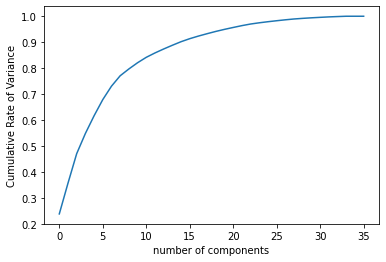

In [14]:
scaled_num_test = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(num_df_test), columns = num_df_test.columns)
pca_test = PCA().fit(scaled_num_test)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("Cumulative Rate of Variance")

#final
pca_test = PCA(n_components = 21)

pca_fit_test = pca_test.fit_transform(scaled_num_test)
num_pca_test = pd.DataFrame(data = pca_fit_test)
pca_test.explained_variance_ratio_.sum()
del num_df_test, scaled_num_test

In [16]:
cat_df_test = pd.get_dummies(cat_df_test)
cat_df_test.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,1,1,0,1,...,0,0,0,1,0,0,0,0,1,0


In [17]:
clf = ExtraTreesClassifier(n_estimators=150, criterion = 'entropy')
clf = clf.fit(cat_df, y)

model = SelectFromModel(clf, prefit=True)
feature_idx = model.get_support()
feature_name = cat_df.columns[feature_idx]

cat_new = pd.DataFrame(model.transform(cat_df), columns = feature_name)
cat_new.head()

ValueError: could not convert string to float: 'RH'

In [ ]:
cat_new_test = pd.DataFrame(cat_df_test, columns = feature_name)
cat_new_test.head()

In [ ]:
# Concatinating numerical and categorical data
train = pd.concat([y, num_pca, cat_df], axis=1)
train = pd.DataFrame(train)

# Verifying missing values
print(f'Total missing values: {train.isnull().sum().sum()}')
print(train.shape)
train.head()

In [ ]:

X = train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:


clf = RandomForestRegressor()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [ ]:
clf.get_params()

In [ ]:



space = {
    "bootstrap": hp.choice("bootstrap", [True, False]),
    "n_estimators": hp.choice("n_estimators", [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]),
    "max_depth": hp.choice("max_depth", [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]),
    "criterion": hp.choice("criterion", ['squared_error', 'absolute_error', 'poisson']),
    "max_features": hp.choice("max_features", ['auto', 'sqrt']),
    "min_samples_leaf": hp.choice ("min_samples_leaf", [1, 2, 4]),
    "min_samples_split": hp.choice("min_samples_split", [2, 4, 6, 8, 10])
}

def hyperparameter_tuning(params):
    rf = RandomForestRegressor(**params,n_jobs=-1, verbose = 0)
    rf.fit(X_train, y_train)
    y_scores = rf.predict(X_test)
    sqrt= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    return {"loss": -sqrt, "status": STATUS_OK}


trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=20, 
    trials=trials
)

print("Best: {}".format(best))

In [ ]:
rf = RandomForestRegressor(bootstrap = False,
                            criterion = "squared_error",
                            max_depth= 80,
                            n_estimators= 800,
                            min_samples_split = 8,
                            min_samples_leaf = 2,
                            max_features= 'sqrt')

rf.fit(X_train, y_train)
y_scores = rf.predict(X_test)
sqrt= np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(sqrt)